# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Gian Patar P. Sirait
- **Email:** giansirait18@gmail.com
- **ID Dicoding:** giansirait

## Menentukan Pertanyaan Bisnis

- On which days of the week do bicycle riders increase? Do holidays or certain days have an influence? Do the types of renters have certain characteristics?
- Does bicycle use increase at certain times of the day?
- Is seasonality a factor in the increase/decrease of rental activity?
- What are the usage patterns of bike-sharing services by month of the year? What is the year-to-year relationship?
- Does the weather affect your cycling activities?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import ipywidgets as widgets
from IPython.display import display


## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- just hour table contain with the hourly variable 
- variables temp, atemp, hum, windspeed have been normalized

## Assessing Data

> Assesing day Table 

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


> Missing Value

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

> Duplicated

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


> Outlier

In [7]:
# Numeric Variable
Nday_df = day_df.select_dtypes(include=['number'])

In [8]:
# Category Variable
Cday_df = day_df.select_dtypes(include=['object','category'])

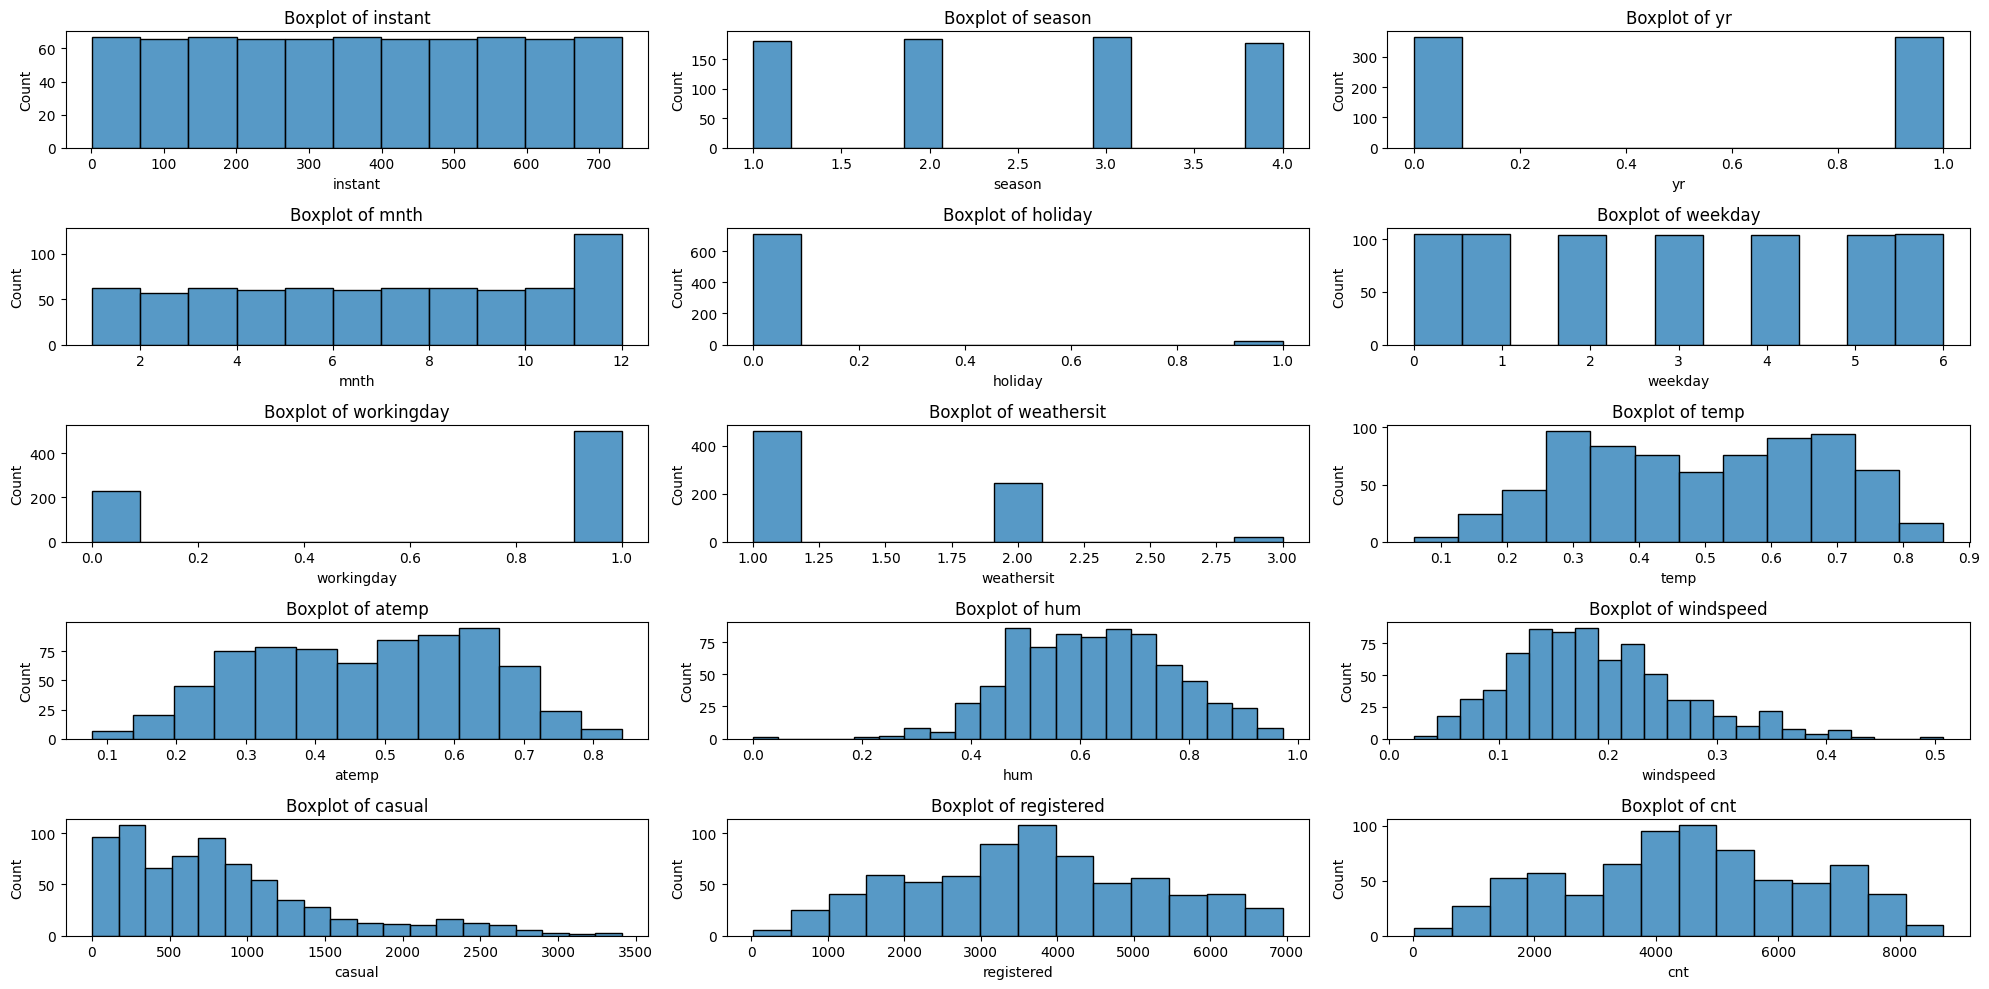

In [9]:
fig, axes = plt.subplots(5,3, figsize=(20,10))

axes = axes.flatten()
for i, column, in enumerate(Nday_df):
    sns.histplot(x=Nday_df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
fig.tight_layout()

plt.show()

In [10]:
from scipy.stats import shapiro
shapiro(Nday_df['registered'])
sw_statistic, sw_pvalue = shapiro(Nday_df['registered'])
if sw_pvalue >0.05:
    print(f'P-value : {sw_pvalue}. So, we assume a normal distribution')
else:
    print(f'p-value: {sw_pvalue}. So, we do not assume a normal distribution')

shapiro(Nday_df['cnt'])
sw_statistic, sw_pvalue = shapiro(Nday_df['cnt'])
if sw_pvalue >0.05:
    print(f'P-value : {sw_pvalue}. So, we assume a normal distribution')
else:
    print(f'p-value: {sw_pvalue}. So, we do not assume a normal distribution')    

p-value: 4.6125629182824923e-07. So, we do not assume a normal distribution
p-value: 2.0795537736262304e-08. So, we do not assume a normal distribution


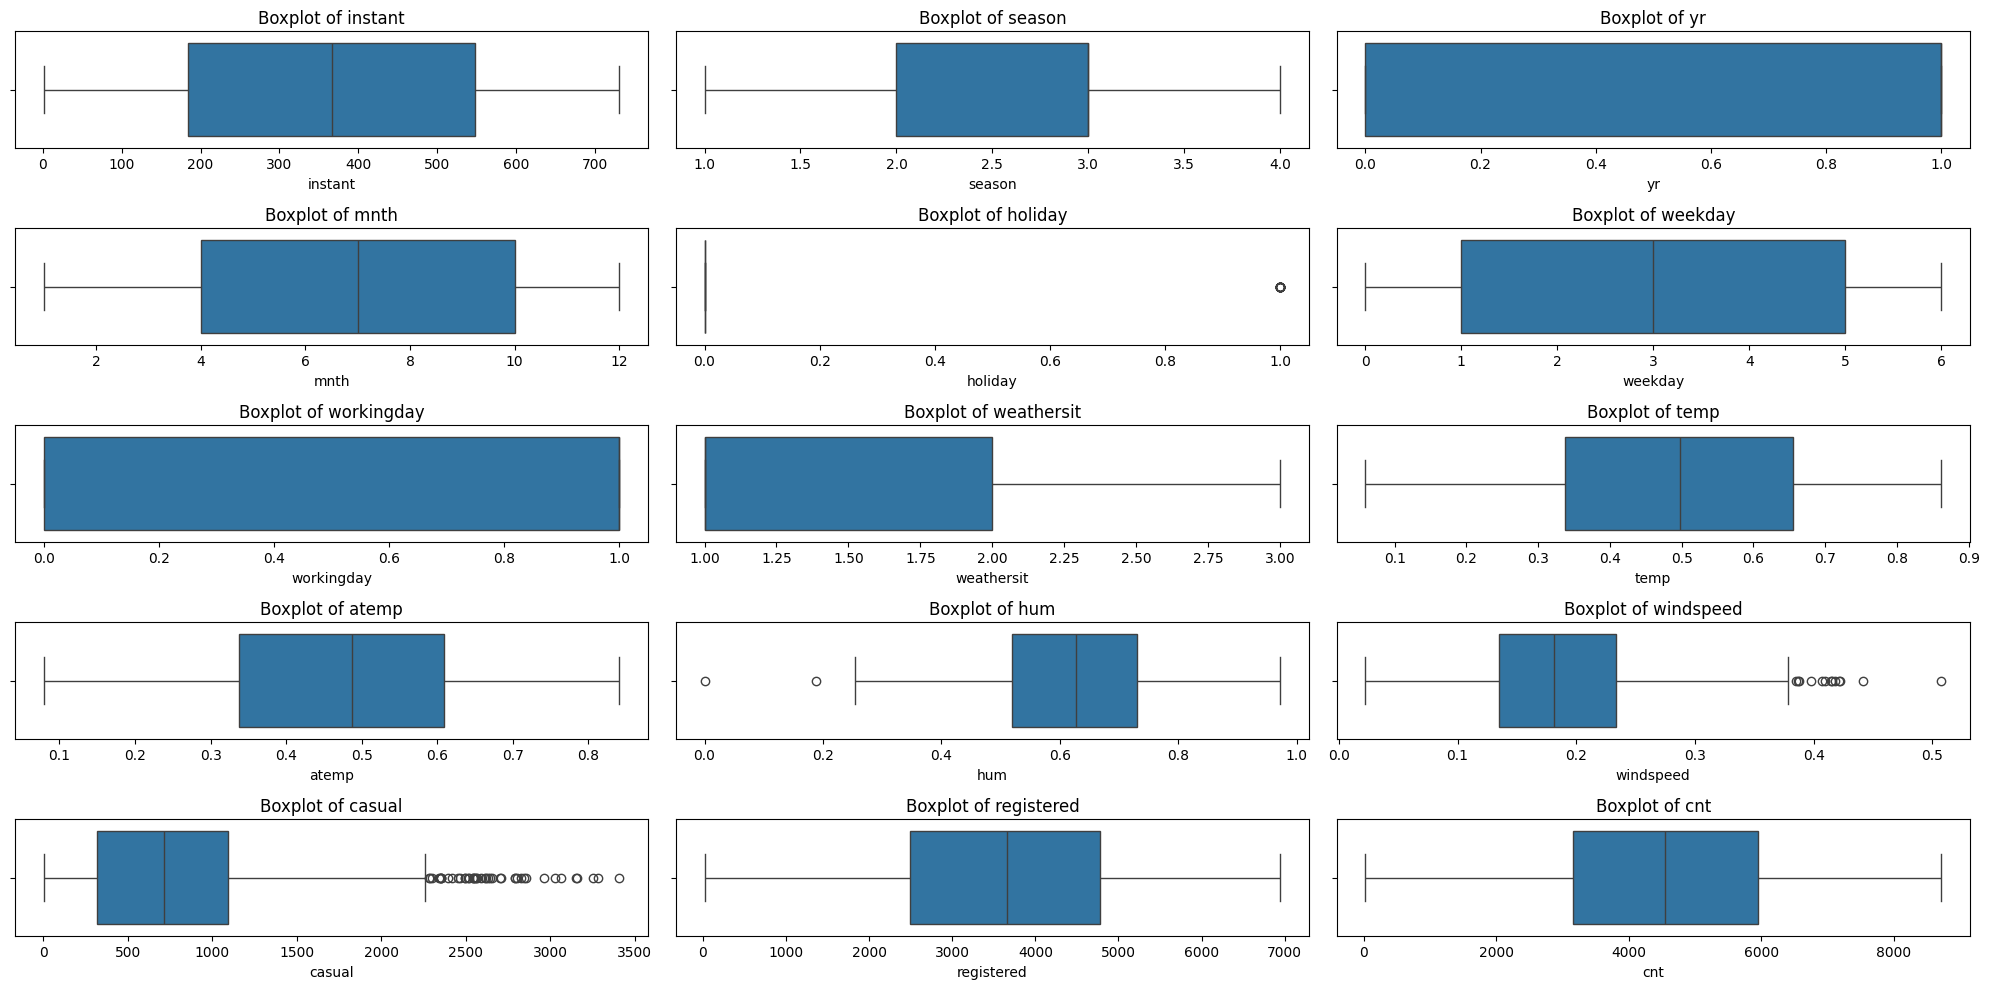

In [11]:
fig, axes = plt.subplots(5,3, figsize=(20,10))

axes = axes.flatten()

for i, column, in enumerate(Nday_df):
    sns.boxplot(x=Nday_df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
fig.tight_layout()
plt.show()
    

In [12]:
def check_outlier(data):
    outliers = []
    for column in data.columns:
        Q1 = Nday_df[column].describe()['25%']
        Q3 = Nday_df[column].describe()['75%']
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier = len(Nday_df[(Nday_df[column]<lower_bound) | (Nday_df[column]>upper_bound)])
        outliers.append(outlier)     
    data_outliers = pd.DataFrame({
        'Columns' : data.columns,
        'Outliers' : outliers
    })
    print(data_outliers.sort_values(by='Outliers', ascending=False))

In [13]:
check_outlier(Nday_df)

       Columns  Outliers
12      casual        44
4      holiday        21
11   windspeed        13
10         hum         2
0      instant         0
1       season         0
2           yr         0
3         mnth         0
5      weekday         0
6   workingday         0
7   weathersit         0
8         temp         0
9        atemp         0
13  registered         0
14         cnt         0


>Statistic Descriptive

In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
day_df.describe(include='object')

,dteday
count,731
unique,731
top,2011-01-01
freq,1


**Insight Day Table:**
- variable 'dteday' have wrong type data 
- no missing value
- no duplicated value
- all variable numeric do not have normal distribution
- not all variable have outlier just variables : casual, holiday, windspeed, and hum.

>Assesing Hour Table 

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


>Missing Value

In [17]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

> Duplicated

In [18]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight Hour Table:**
- variable 'dteday' have wrong type data 
- no missing value
- no duplicated value

### Cleaning Data

> Change type variable

In [19]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Hour Table
hour_df['dteday'] = pd.to_datetime(day_df['dteday'])

**Insight:**
- change type of variable 'dteday' in hour_df table and day_df
- pass missing value and duplicated because there no outliers and missing values in both table.
- I decided to not deleted the outlier because the values appear logically explainable rather than anomalous.

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
# Map Season
season_mapping = {
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

weathersit = {
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
}

hour_df['season'] = hour_df['season'].map(season_mapping)
day_df['season'] = day_df['season'].map(season_mapping)

day_df['weathersit'] = day_df['weathersit'].map(weathersit)

# Change to the name of Day
day_df['weekday'] = day_df['dteday'].dt.day_name()
hour_df['weekday'] = hour_df['dteday'].dt.day_name()

# Change to the name of Month
day_df['mnth'] = day_df['dteday'].dt.month_name()
hour_df['mnth'] = hour_df['dteday'].dt.month_name()

In [21]:
#Change the value of Working day variable
day_df['workingday'] = np.where(day_df['workingday'] == 1, 'Working Day', 'Holiday/Weekend')
hour_df['workingday'] = np.where(hour_df['workingday'] == 1, 'Working Day', 'Holiday/Weekend')

#Change
day_df['yr'] = np.where(day_df['yr'] == 1, 2012, 2011)

In [22]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

> Distribution And Outlier

In [23]:
# Numeric Variable
Nhour_df = hour_df.select_dtypes(include=['number'])
# Category Variable
Chour_df = hour_df.select_dtypes(include=['object','category'])

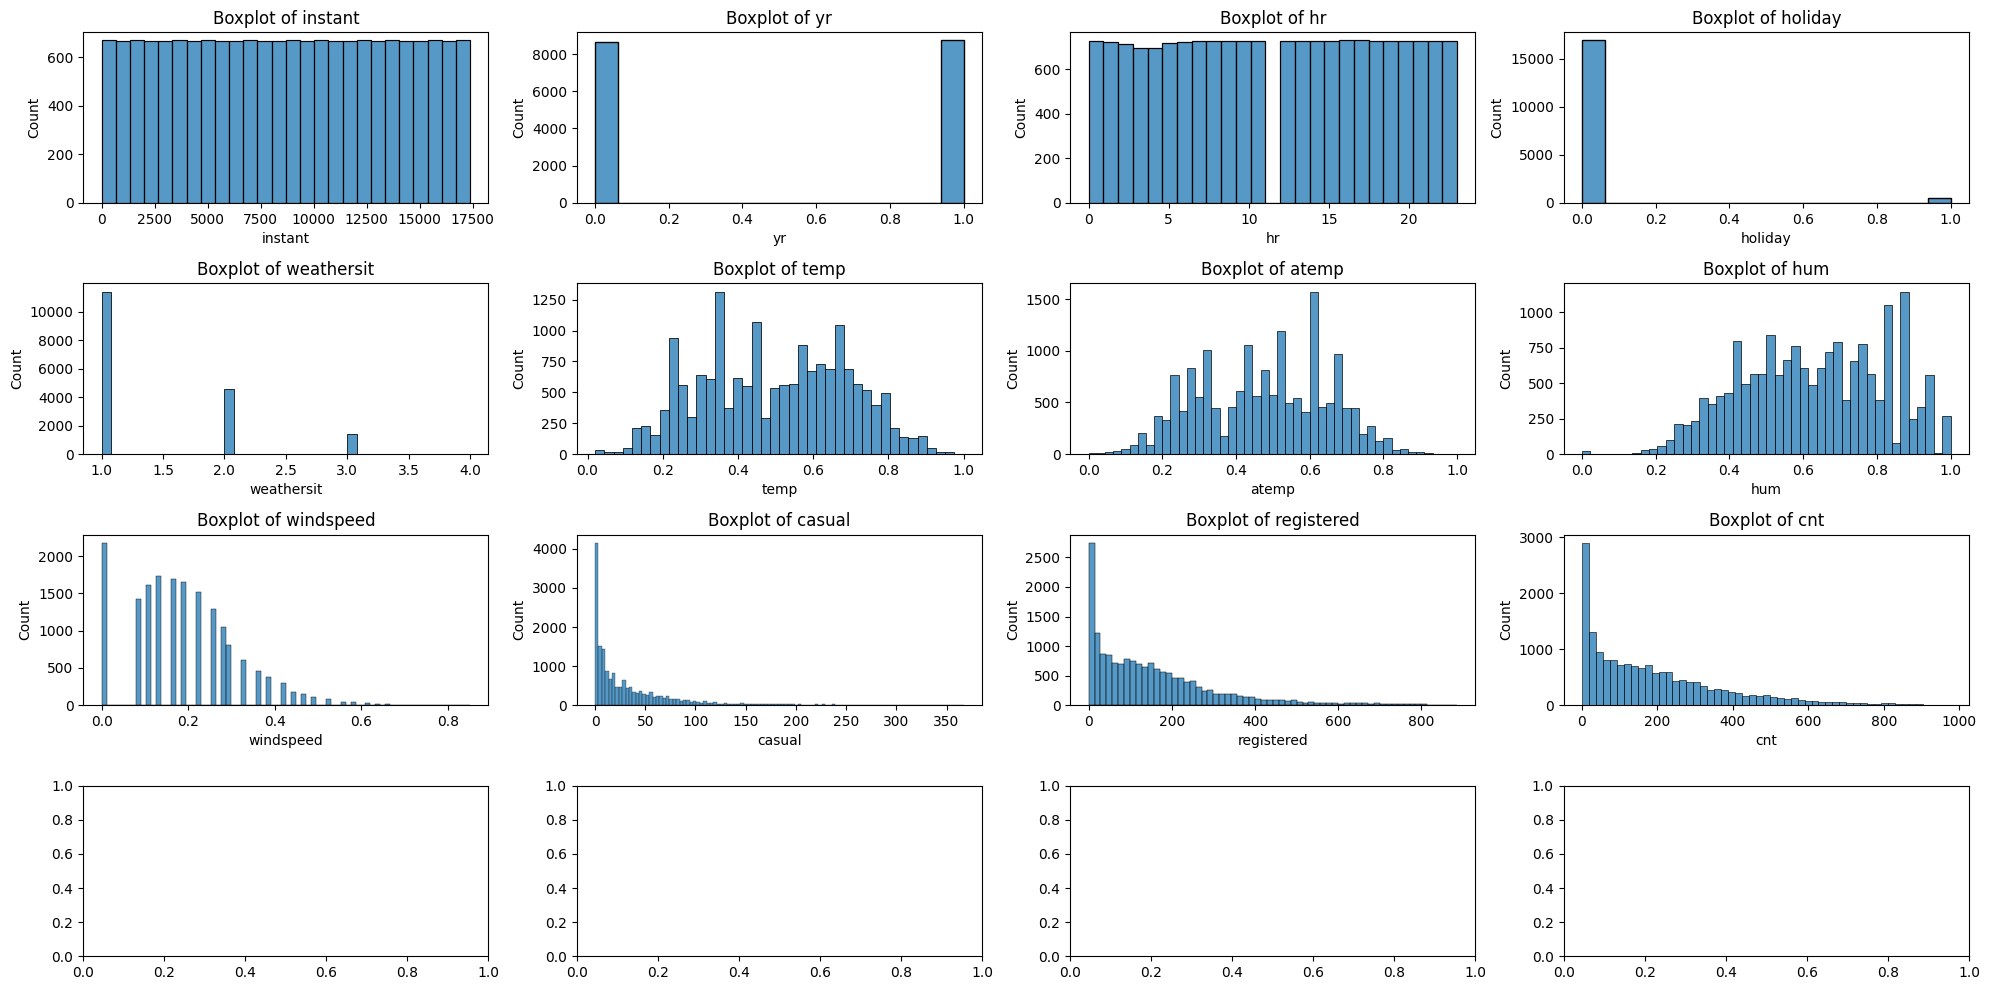

In [24]:
fig, axes = plt.subplots(4,4, figsize=(20,10))

axes = axes.flatten()
for i, column, in enumerate(Nhour_df):
    sns.histplot(x=Nhour_df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
fig.tight_layout()

plt.show()

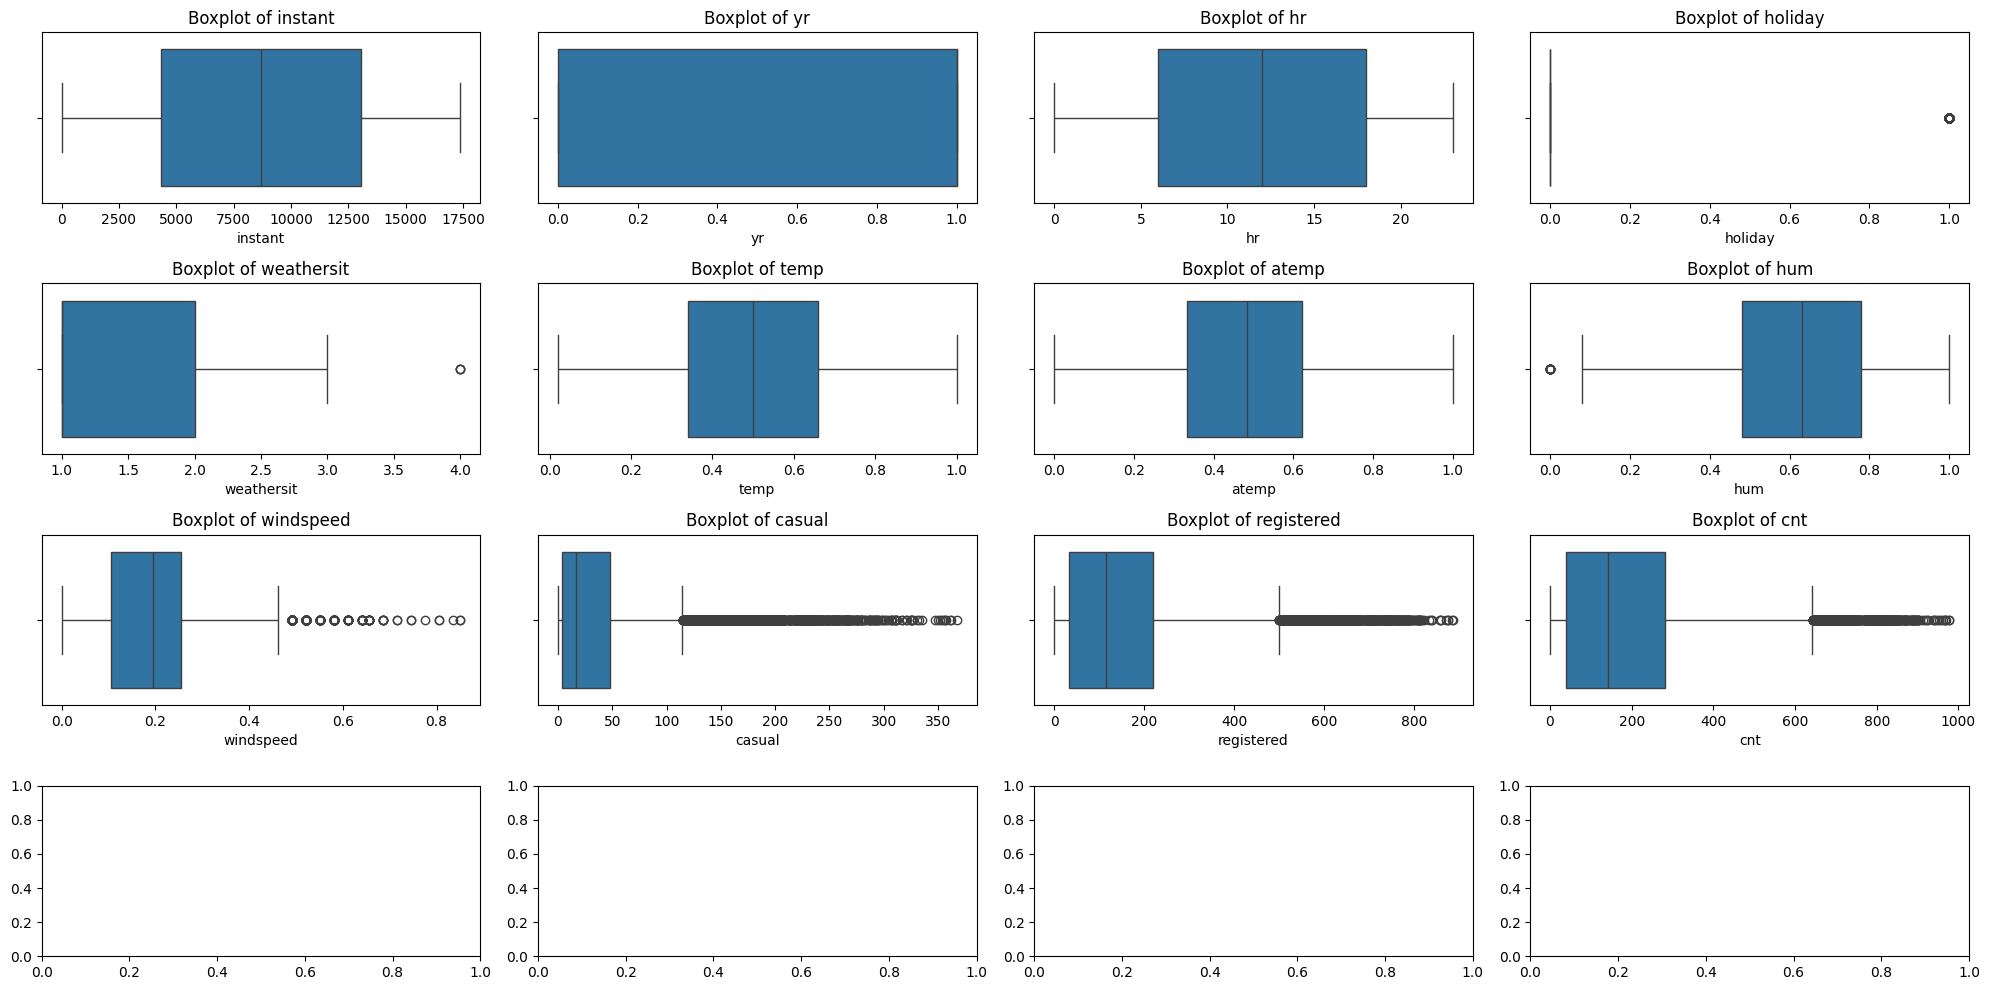

In [25]:
fig, axes = plt.subplots(4,4, figsize=(20,10))

axes = axes.flatten()

for i, column, in enumerate(Nhour_df):
    sns.boxplot(x=Nhour_df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
fig.tight_layout()
plt.show()
    

In [26]:
def check_outlier(data):
    outliers = []
    for column in data.columns:
        Q1 = Nhour_df[column].describe()['25%']
        Q3 = Nhour_df[column].describe()['75%']
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier = len(Nhour_df[(Nhour_df[column]<lower_bound) | (Nhour_df[column]>upper_bound)])
        outliers.append(outlier)     
    data_outliers = pd.DataFrame({
        'Columns' : data.columns,
        'Outliers' : outliers
    })
    print(data_outliers.sort_values(by='Outliers', ascending=False))

In [27]:
check_outlier(Nhour_df)

       Columns  Outliers
9       casual      1192
10  registered       680
11         cnt       505
3      holiday       500
8    windspeed       342
7          hum        22
4   weathersit         3
0      instant         0
1           yr         0
2           hr         0
5         temp         0
6        atemp         0


>Statistic descriptive

In [28]:
Nday_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [29]:
day_df.describe(include='object').T

,count,unique,top,freq
season,731,4,fall,188
mnth,731,12,January,62
weekday,731,7,Saturday,105
workingday,731,2,Working Day,500
weathersit,731,3,Clear/Partly Cloudy,463


**Insight:**
- all variable numeric do not have normal distribution
- not all variable have outlier just variables : casual, holiday, windspeed, and hum.
- all data have the right format and consistency.

In [30]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

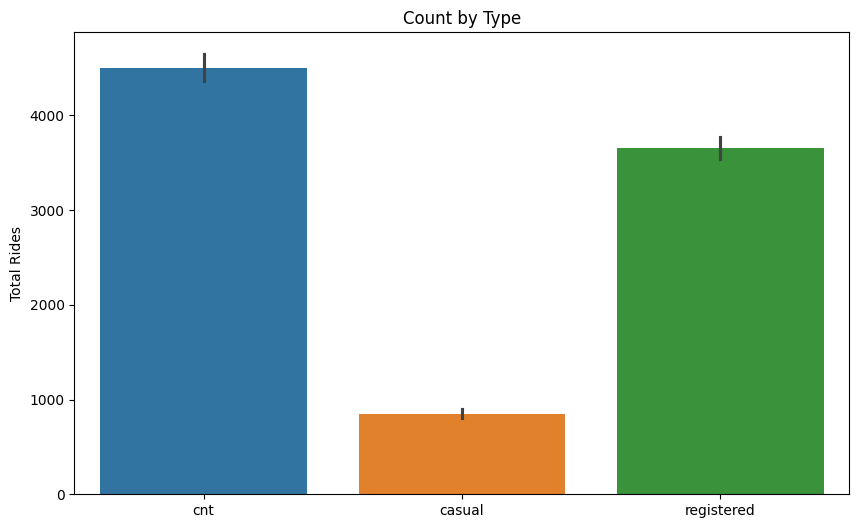

In [31]:
plt.figure(figsize=(10,6))

sns.barplot(data=day_df[['cnt', 'casual', 'registered']])

# Add labels and a title to the plot
plt.ylabel("Total Rides")
plt.title("Count by Type")

# Show the plot
plt.show()

**Insight:**
- registered riders have the most riders than casual riders.

In [32]:
day_df.groupby(by='holiday').agg({
    'casual' : ['max','min','mean','sum'],
    'registered' : ['max','min','mean','sum']
})

casual                           registered                           
           max  min         mean     sum        max  min         mean      sum
holiday                                                                       
0         3410    2   841.771831  597658       6946   20  3685.332394  2616586
1         3065  117  1064.714286   22359       5172  573  2670.285714    56076

**Insight:**
- 'casual' and 'registered' cyclist activity is high during holidays.

>Working day

In [33]:
day_df.groupby(by='workingday').agg({
    'casual' : ['max','min','mean','sum'],
    'registered' : ['max','min','mean','sum']
})

casual                          registered                    \
                   max min         mean     sum        max  min         mean   
workingday                                                                     
Holiday/Weekend   3410  54  1371.134199  316732       5966  451  2959.034632   
Working Day       2469   2   606.570000  303285       6946   20  3978.250000   

                          
                     sum  
workingday                
Holiday/Weekend   683537  
Working Day      1989125

**Insight:**
- same with 'holiday' variable 'casual' and 'registered' cyclist activity is high during holidays/weekend.

> Data day to day

In [34]:
day_df.groupby(by=['weekday']).agg({
    'cnt' : ['max','min','mean','sum'],
})

cnt                           
            max   min         mean     sum
weekday                                   
Friday     8362  1167  4690.288462  487790
Monday     7525    22  4338.123810  455503
Saturday   8714   627  4550.542857  477807
Sunday     8227   605  4228.828571  444027
Thursday   7804   431  4667.259615  485395
Tuesday    7767   683  4510.663462  469109
Wednesday  8173   441  4548.538462  473048

**Insight:**
- Monday is the day where cyclists have the smallest number of riders among all days and Friday have the biggest.

>Month

In [35]:
day_df.groupby(by=['mnth']).agg({
    'cnt' : ['max','min','mean','sum'],
})

cnt                           
            max   min         mean     sum
mnth                                      
April      7460   795  4484.900000  269094
August     7865  1115  5664.419355  351194
December   6606   441  3403.806452  211036
February   5062  1005  2655.298246  151352
January    4521   431  2176.338710  134933
July       8173  3285  5563.677419  344948
June       8120  3767  5772.366667  346342
March      8362   605  3692.258065  228920
May        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
October    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

**Insight:**
- 'casual' and 'registered' cyclists have fewer riders at the beginning of the year, in January and February.

> Activity Base On Weather

In [36]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [37]:
day_df.groupby(by='weathersit').agg({
    'casual' : ['max','min','mean','sum'],
    'registered' : ['max','min','mean','sum']
})

casual                         registered       \
                       max min        mean     sum        max  min   
weathersit                                                           
Clear/Partly Cloudy   3410  15  964.030238  446346       6946  416   
Light Snow/Rain       1264   2  185.476190    3895       4324   20   
Misty/Cloudy          3155   9  687.352227  169776       6844  491   

                                           
                            mean      sum  
weathersit                                 
Clear/Partly Cloudy  3912.755940  1811606  
Light Snow/Rain      1617.809524    33974  
Misty/Cloudy         3348.510121   827082

**Insight:**
- casual and registered cyclists are few during 'Light Snow/Rain' weather and crowded during 'Clear/Partly Cloudy' weather.

> Temperatur

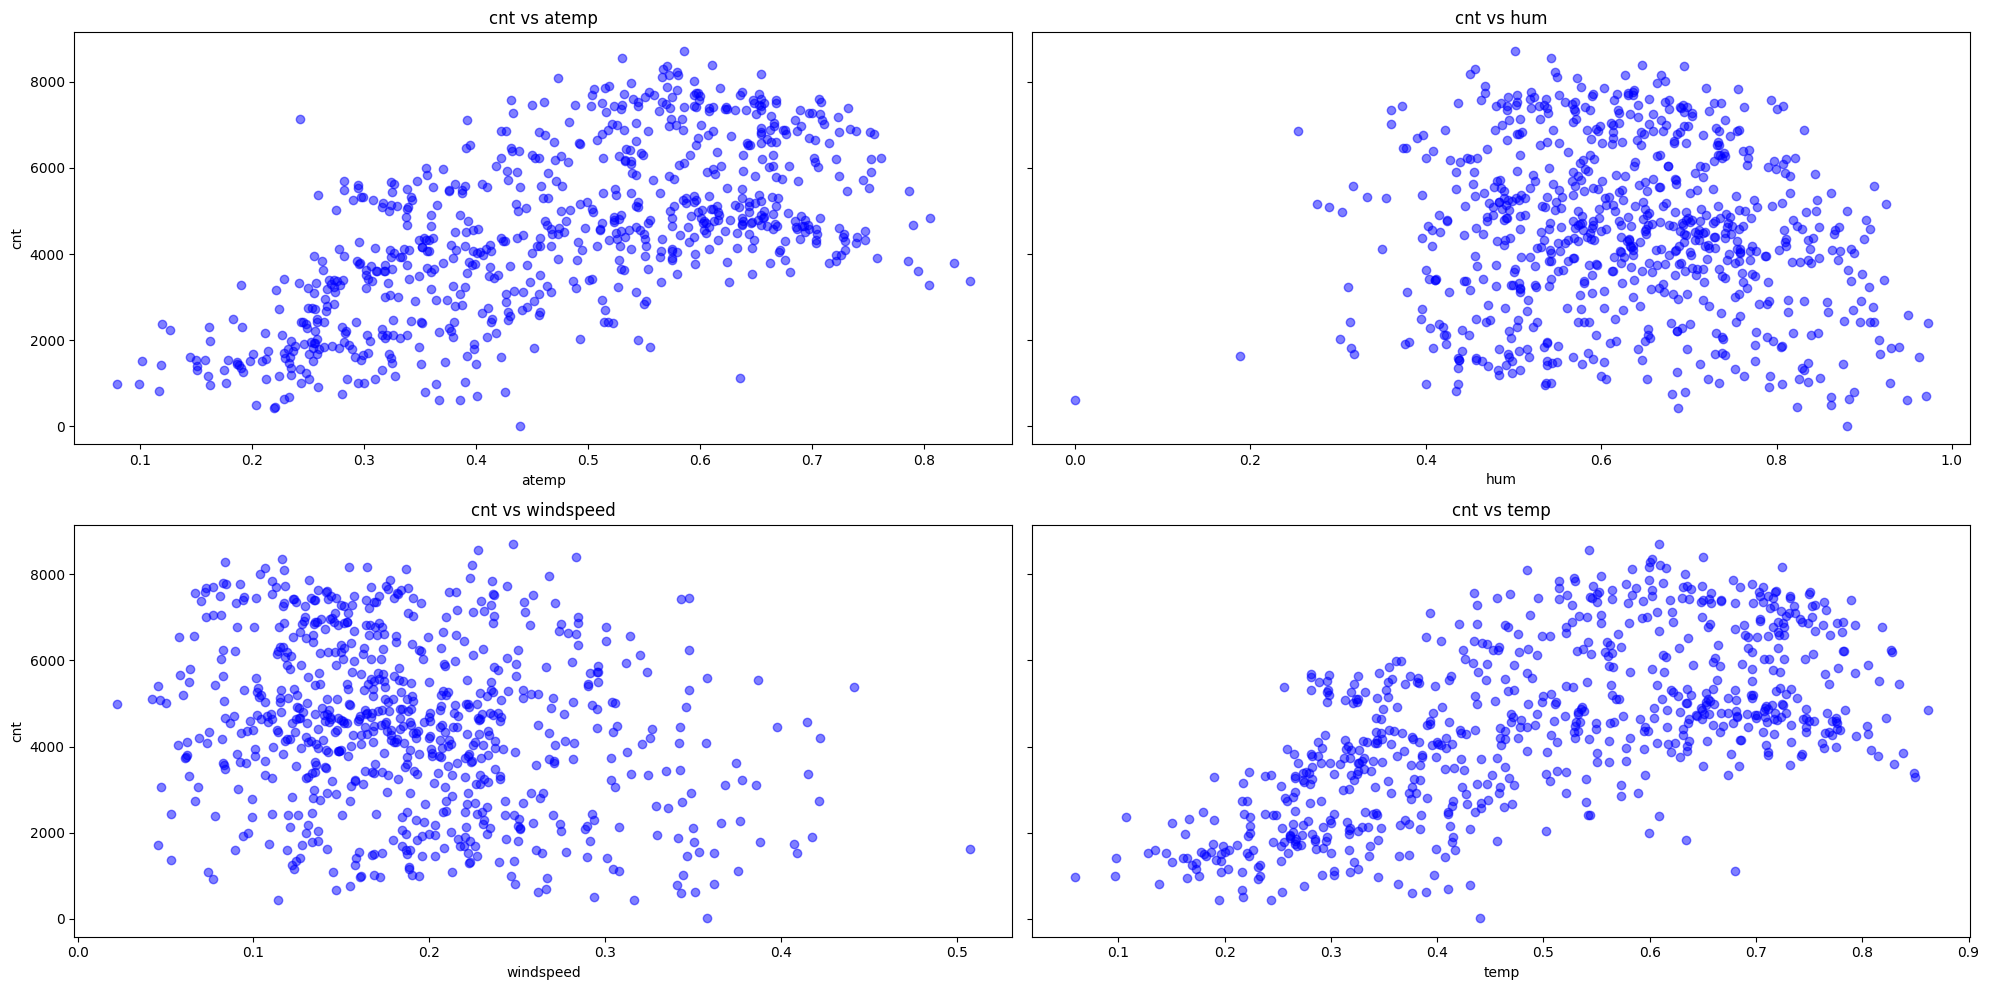

In [38]:
import matplotlib.pyplot as plt

# Daftar variabel yang akan digunakan untuk scatter plot
variables = ['atemp', 'hum', 'windspeed', 'temp']

# Ukuran dan pengaturan layout dari plot
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True)

# Looping untuk membuat scatter plot untuk setiap variabel
for i, var in enumerate(variables):
    row, col = divmod(i, 2)  # Menghitung posisi row dan column
    axes[row, col].scatter(x=day_df[var], y=day_df['cnt'], alpha=0.5, color='blue')
    axes[row, col].set_title(f'cnt vs {var}')
    axes[row, col].set_xlabel(var)
    if col == 0:  # Mengatur hanya untuk kolom pertama
        axes[row, col].set_ylabel('cnt')

plt.tight_layout()
plt.show()

**Insight:**
- There is a positive relationship between **'cnt'** and **'atemp'**. indicating that the higher the temperature, the more bike loans.
- There is no clear pattern between **'cnt'** and **'hum'**, indicating no significant relationship.
- Same, there is no clear correlation between 'cnt' and 'windspeed'.
- There is a positive relationship between **'cnt'** and **'temp'**. indicating that the higher the temperature, the more bike loans. (Same with **atemp**!!, Yes because both variable have the same value which is temperatur)

> Boxplot 

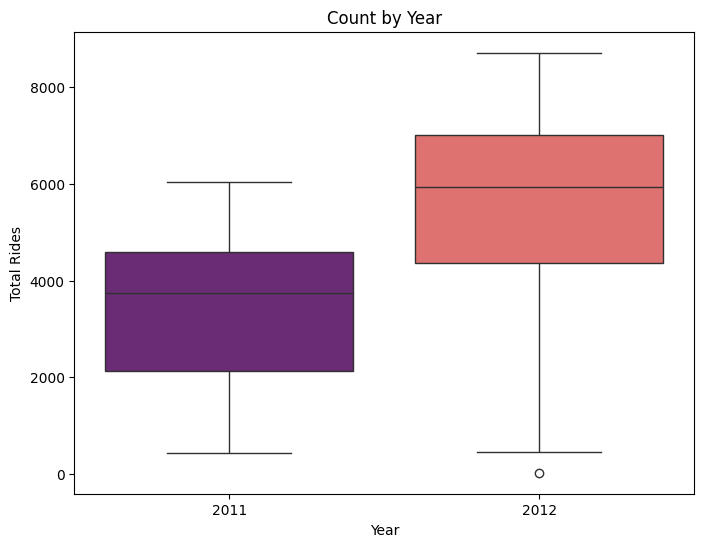

In [39]:
plt.figure(figsize=(8,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(x="yr",y="cnt",data=day_df,palette='magma')

# Add labels and a title to the plot
plt.xlabel("Year")
plt.ylabel("Total Rides")
plt.title("Count by Year")

# Show the plot
plt.show()

**Insight:**
- Now we now riders in 2012 more than 2011.
- 2012 have outlier at the beginning of the year, that's mean riders in beginning in of the year small.

> Corelation betwen variable Numeric

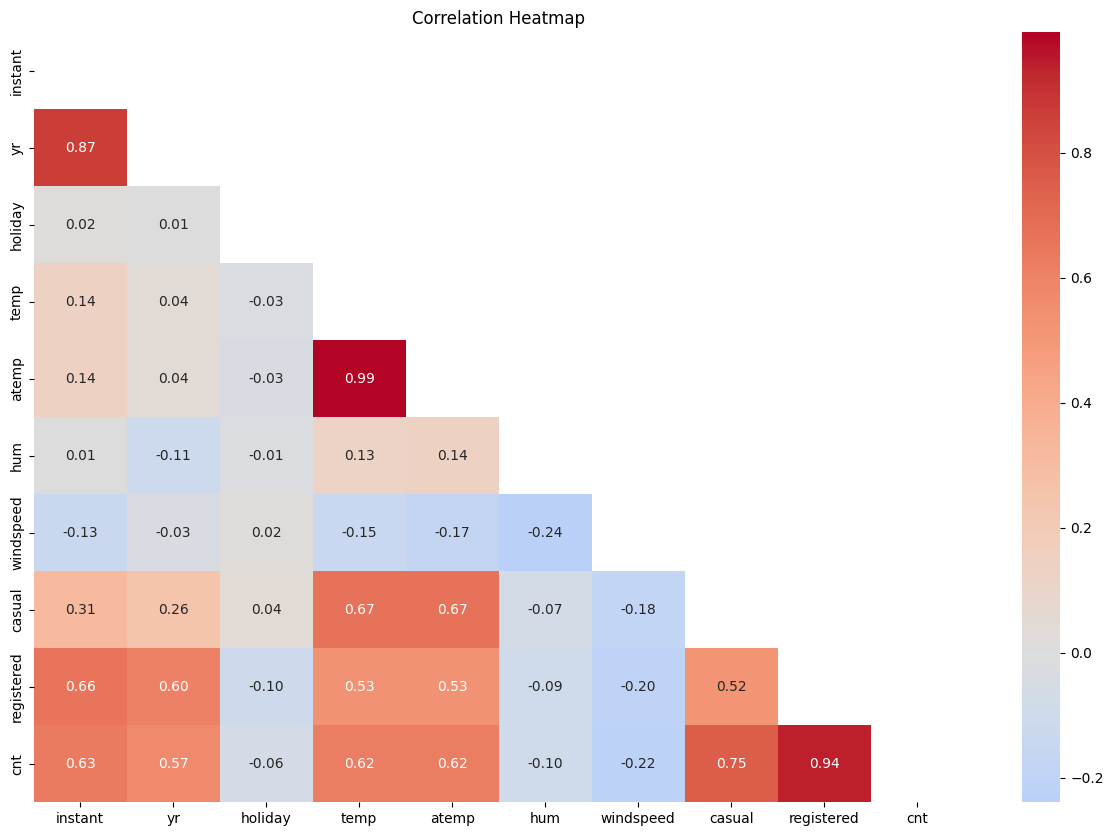

In [40]:
correlation_matrix = day_df.select_dtypes(include=['int','float64']).corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(15,10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insight:**
- we can see now if 'registered' with 'cnt',
    'temp' with 'atemp',
    'instant' and 'yr', <b>they have postive and strong corelation</b>. 
- corelation between <b>'registered'</b> and <b>'cnt'</b> have mean if 'registered' is type rader that <b>mostly user</b> of bike sharing.
- corelation between <b>'temp'</b> and <b>'atemp'</b> have strong corelation almost perfect it's happend because the value from this two variable acctually have same information which is <b>temperature</b>.
- corelation between <b>'cnt'</b> and <b>'yr'</b> have strong corelation, now we know if From <b>2011 to 2012</b>, bicycle use <b>increased</b>, giving us an indication that use in <b>2013 will probably increase as well</b>.

## Visualization & Explanatory Analysis

### Pertanyaan 1: On which days of the week do bicycle riders increase? Do holidays or certain days have an influence? Do the types of renters have certain characteristics?

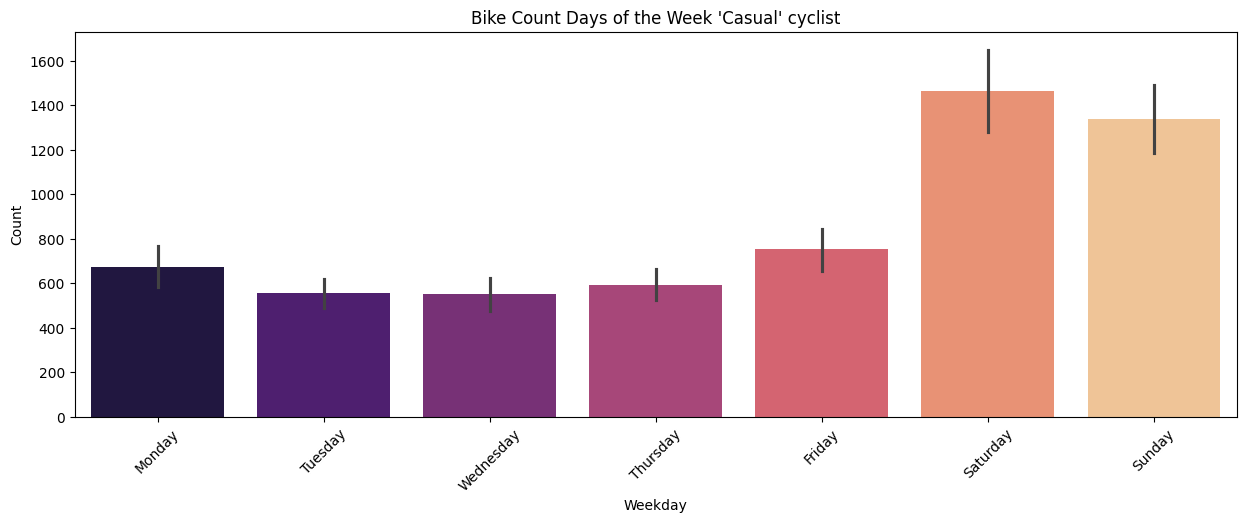

In [41]:
# Assuming 'day_df' contains a column 'weekday' with the weekdays
plt.figure(figsize=(15, 5))
sns.barplot(x='weekday', y='casual', data=day_df,palette='magma', order=day_order)

plt.title("Bike Count Days of the Week 'Casual' cyclist")
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

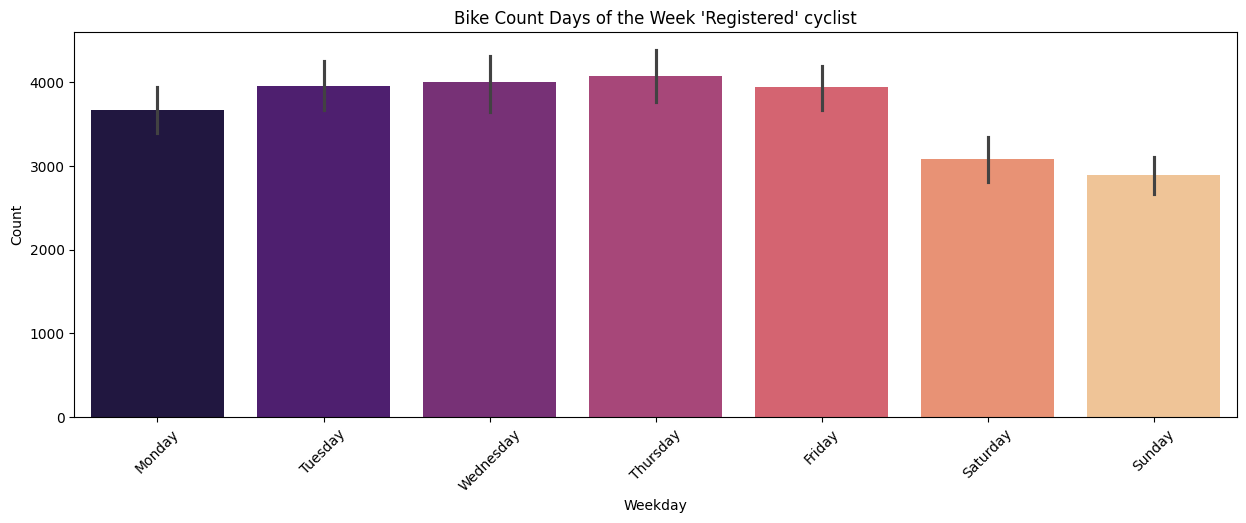

In [42]:
# Assuming 'day_df' contains a column 'weekday' with the weekdays
plt.figure(figsize=(15, 5))
sns.barplot(x='weekday', y='registered', data=day_df,palette='magma', order=day_order)

plt.title("Bike Count Days of the Week 'Registered' cyclist")
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

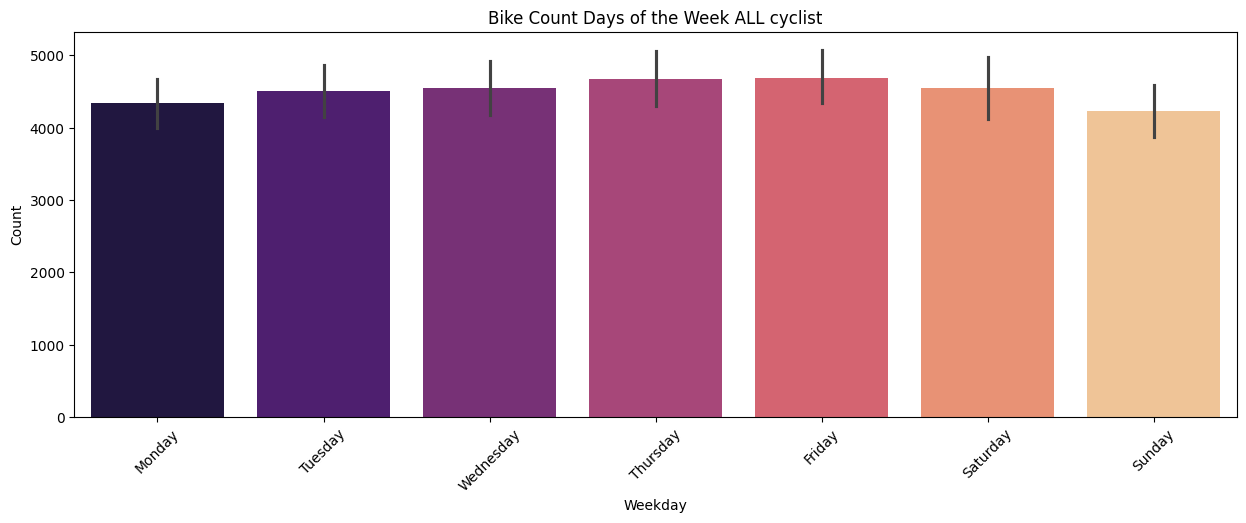

In [43]:
# Assuming 'day_df' contains a column 'weekday' with the weekdays
plt.figure(figsize=(15, 5))
sns.barplot(x='weekday', y=day_df['cnt'], data=day_df,palette='magma', order=day_order)

plt.title("Bike Count Days of the Week ALL cyclist")
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Dropdown filter untuk memilih kolom y-axis
y_axis_selector = widgets.Dropdown(
    options=['registered', 'casual', 'cnt'],  # Pilihan kolom untuk y-axis
    value='registered',
    description='Y-Axis:'
)

# Fungsi untuk memperbarui grafik berdasarkan pilihan y-axis
def update_plot(y_axis):
    plt.figure(figsize=(15, 5))
    sns.barplot(x='weekday', y=y_axis, data=day_df, palette='magma', order=day_order)
    plt.title(f'Count of Bike Rentals by {y_axis.capitalize()}')
    plt.xlabel('Weekday')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Menggunakan interactive widget untuk memilih y-axis
widgets.interactive(update_plot, y_axis=y_axis_selector)


interactive(children=(Dropdown(description='Y-Axis:', options=('registered', 'casual', 'cnt'), value='register…

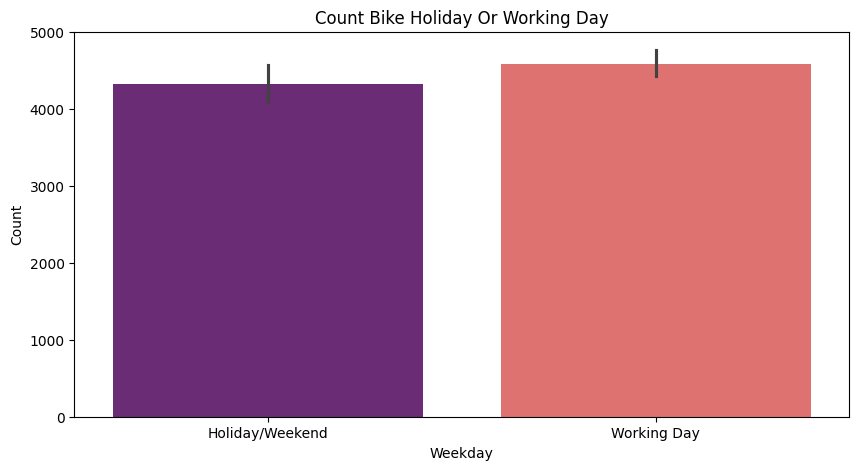

In [45]:
# Assuming 'day_df' contains a column 'weekday' with the weekdays
plt.figure(figsize=(10, 5))
sns.barplot(x='workingday', y='cnt', data=day_df,palette='magma')

plt.title('Count Bike Holiday Or Working Day')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

**Insight:**
- **'Registered'** and **'Casual'** cyclists have their own characteristics, where 'Casual' cyclists mostly rent on weekends and 'Registered' cyclists mostly rent on weekdays, i.e. Wednesday, Thursday, Friday, Saturday. 
- With data variable **'workingday'** Overall, bicycle renters are more likely to rent bicycles during weekdays than holidays and weekends.

### Pertanyaan 2: Does bicycle use increase at certain times of the day?

> Hour

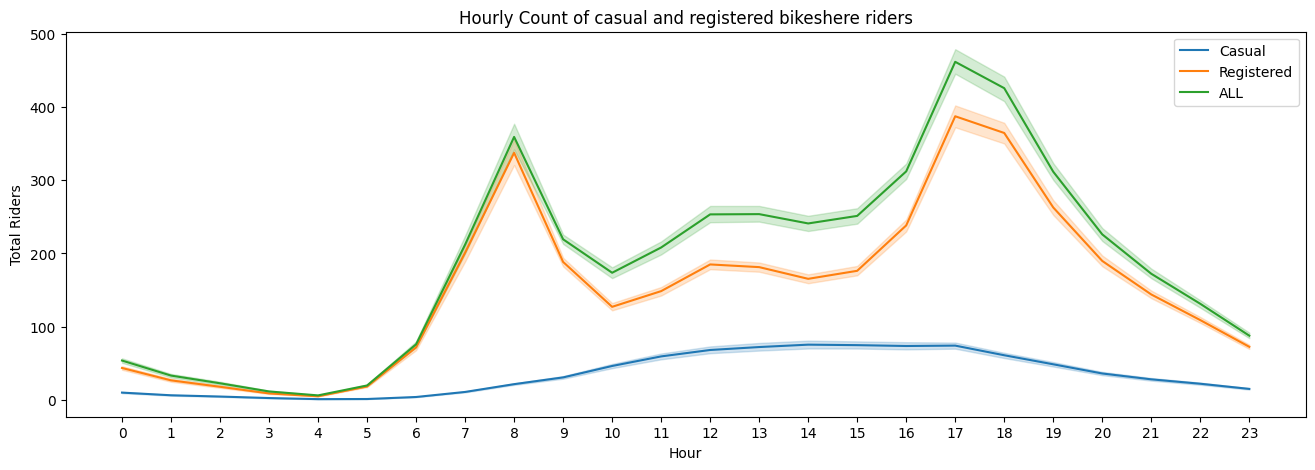

In [46]:
plt.figure(figsize=(16,5))
sns.lineplot(data=hour_df, x='hr', y='casual', label='Casual')
sns.lineplot(data=hour_df, x='hr', y='registered', label='Registered')
sns.lineplot(data=hour_df, x='hr', y='cnt', label='ALL')
plt.title("Hourly Count of casual and registered bikeshere riders")
plt.xlabel("Hour")
plt.ylabel("Total Riders")
plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)])
plt.show()

**Insight:**
- Bicycle rental activity by 'Registered' users has an increase at certain times such as 7am - 8am and at 17pm - 19pm. 
- 'Casual' renter activity does not have a significant increase but there is an increase from 7am and a decrease at 5pm.
- Overall the number of increases over time is similar to the activity of 'Registered' renters because the number of 'Registered' renters has a big difference with 'Casual' renters. 

### Pertanyaan 3: Is seasonality a factor in the increase/decrease of rental activity?

In [47]:
season_data = hour_df.groupby(by=['season']).agg(
    {
        'casual' : 'sum',
        'registered' : 'sum',
        'cnt' : 'sum'
    }
).reset_index()
season_data

,season,casual,registered,cnt
0,fall,226091,835038,1061129
1,springer,60622,410726,471348
2,summer,203522,715067,918589
3,winter,129782,711831,841613


In [48]:
season_data_unpivot = pd.melt(season_data,
                              id_vars=['season'],
                              value_vars=['casual','registered'],
                              var_name='status',
                              value_name='Count')

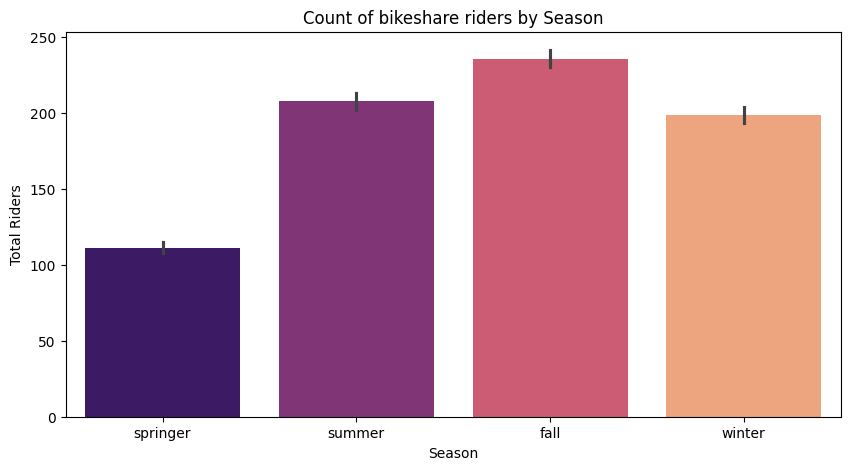

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x='season', y=hour_df['cnt'],data=hour_df, palette='magma')
plt.title('Count of bikeshare riders by Season')
plt.xlabel('Season')
plt.ylabel('Total Riders')
plt.show()

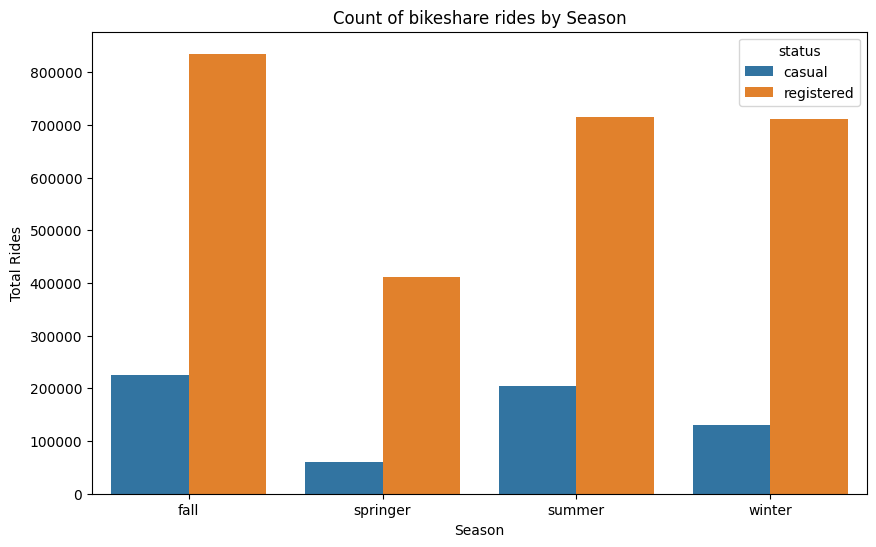

In [50]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='Count', data=season_data_unpivot, hue='status')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

**Insight:**
- Different seasons also differ in the number of bicycle rental activities, indicating that the activity of bicycle renters is influenced by the factor of season.
- 'Casual' and 'Registered' tenants have no difference in activity levels. highest in the **fall** season and lowest in **winter**.

### Pertanyaan 4: What are the usage patterns of bike-sharing services by month of the year? What is the year-to-year relationship?

In [51]:
year_data = day_df.groupby(by=['yr','mnth']).agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

In [52]:
year_data['total'] = year_data['casual'] + year_data['registered']

In [53]:
order_month = ['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']

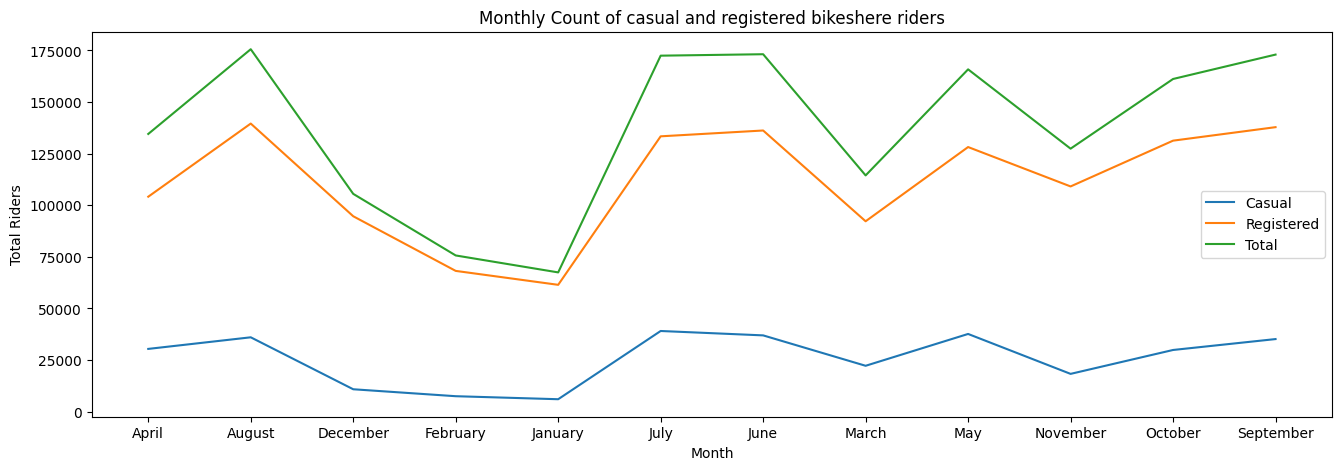

In [54]:
plt.figure(figsize=(16,5))
sns.lineplot(data=year_data, x='mnth', y='casual', label='Casual', ci=None)
sns.lineplot(data=year_data, x='mnth', y='registered', label='Registered',ci=None)
sns.lineplot(data=year_data, x='mnth', y='total', label='Total',ci=None)
plt.title("Monthly Count of casual and registered bikeshere riders")
plt.xlabel("Month")
plt.ylabel("Total Riders")
plt.show()

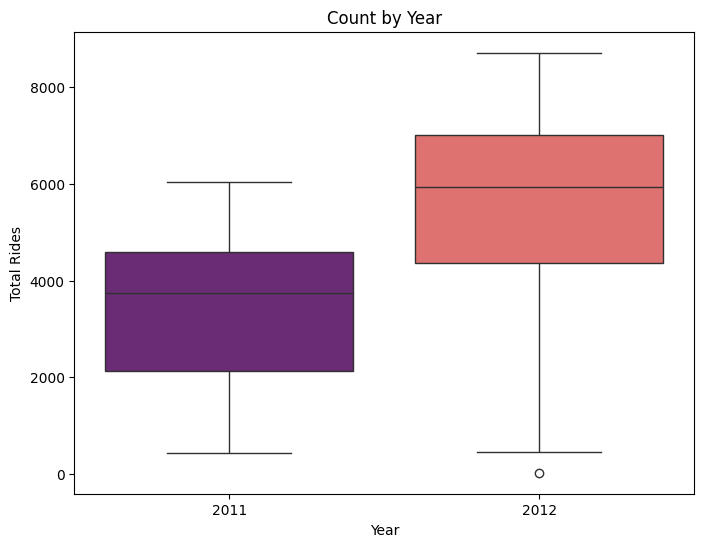

In [55]:
plt.figure(figsize=(8,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(x="yr",y="cnt",data=day_df,palette='magma')

# Add labels and a title to the plot
plt.xlabel("Year")
plt.ylabel("Total Rides")
plt.title("Count by Year")

# Show the plot
plt.show()

**Insight:**
- There is a significant increase in certain months viz: July, June, August, May, and September. This **increase** was the same for both 'Casual' and 'Regestered' tenant groups.
- While the level of rental activity from 2011 - 2012 saw a significant increase, it is difficult to conclude that rentals in **2013** will increase due to lack of data.

### Pertanyaan 5: Does the weather affect cycling rental activities?

In [56]:
wheater_data = day_df.groupby(by=['weathersit']).agg(
    {
        'casual' : 'sum',
        'registered' : 'sum',
        'cnt' : 'sum'
    }
).reset_index()
wheater_data

,weathersit,casual,registered,cnt
0,Clear/Partly Cloudy,446346,1811606,2257952
1,Light Snow/Rain,3895,33974,37869
2,Misty/Cloudy,169776,827082,996858


In [57]:
weathersit_data_unpivot = pd.melt(wheater_data,
                              id_vars=['weathersit'],
                              value_vars=['casual','registered'],
                              var_name='status',
                              value_name='Count')
weathersit_data_unpivot

,weathersit,status,Count
0,Clear/Partly Cloudy,casual,446346
1,Light Snow/Rain,casual,3895
2,Misty/Cloudy,casual,169776
3,Clear/Partly Cloudy,registered,1811606
4,Light Snow/Rain,registered,33974
5,Misty/Cloudy,registered,827082


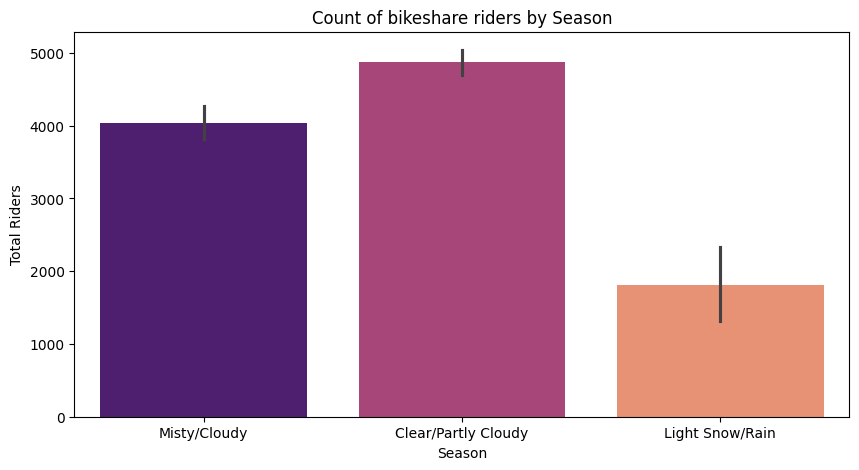

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x='weathersit', y=day_df['cnt'],data=day_df, palette='magma')
plt.title('Count of bikeshare riders by Season')
plt.xlabel('Season')
plt.ylabel('Total Riders')
plt.show()

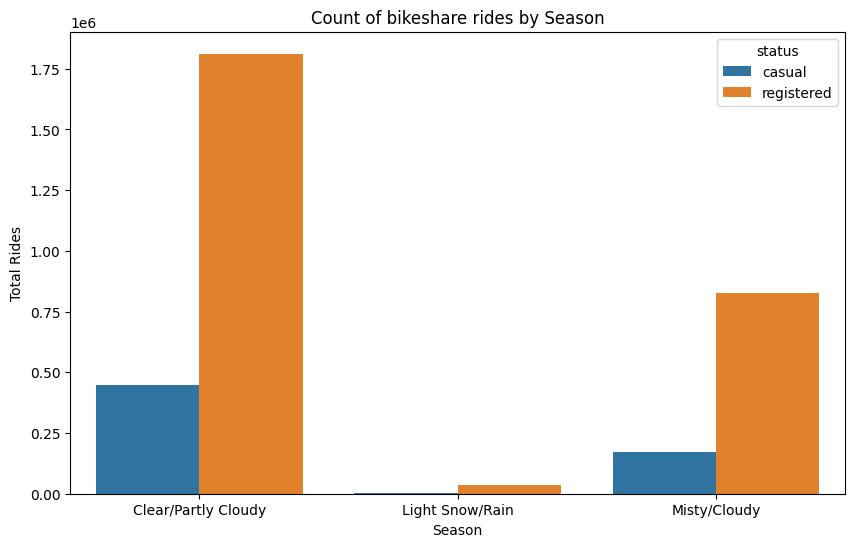

In [59]:
plt.figure(figsize=(10,6))

sns.barplot(x='weathersit', y=weathersit_data_unpivot['Count'], data=weathersit_data_unpivot, hue='status')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

**Insight:**
- While the weather also affects bicycle usage, the usage activities of **both** types of cyclists have **similar characteristics**.


## Conclusion

### Conclution Queation 1 : On which days of the week do bicycle riders increase? Do holidays or certain days have an influence? Do the types of renters have certain characteristics?

> “Registered” and ‘Casual’ bicycle users have different needs. “Casual” users tend to rent bicycles more often on weekends, while ‘Registered’ users tend to rent bicycles on weekdays. When their data is combined, it can be seen that bicycle usage is higher on weekdays, which is due to the dominance of “Registered” users. However, the difference between the number of bike rentals on weekdays and weekends is not very significant. Therefore, it is important to consider the unique characteristics of each user group in further analysis.

### Conclution Queation 2 :Does bicycle use increase at certain times of the day?

> Bicycle usage shows an increase at certain hours that differ between “Registered” and “Casual” users. “Registered” users tend to rent bicycles during peak hours of 7-8am and 5-7pm, which represent commuting activities. On the other hand, “Casual” users have a more stable usage pattern, with a gradual increase from 8am, peaking around 2pm, and then decreasing after 3pm. Overall, the usage pattern is more similar to the “Registered” group as there are far more “Registered” users than “Casual” users. 

### Conclution Queation 3 :Is seasonality a factor in the increase/decrease of rental activity?

> Seasonal changes also affect bicycle rental activity in both 'Registered' and 'Casual' groups. This may be due to the changing road conditions due to the seasons, with **fall** season having the highest rentals and **winter** season having the lowest rentals.

### Conclution Queation 4 : What are the usage patterns of bike-sharing services by month of the year? What is the year-to-year relationship?

> month-to-month activity within a year also shows a change in bicycle rental activity in certain months, namely in August, July, June, and May. this activity pattern is the same in both 'Registered' and 'Casual' groups. this indicates that there is indeed an event that occurs in this month. for the year itself there is a significant increase from 2011 - 2012, activity increased in 2012 there is a possibility that the needs of 2013 will increase as well but it is difficult to draw conclusions due to lack of data.

### Conclution Queation 5 : Does the weather affect cycling rental activities?

> The weather influenced bicycle rental activity in both the 'registered' and 'casual' groups. previously we have also analyzed whether the season has an influence on activity? and the answer is **Yes**. previously also in EDA it was found that temperature also has a correlation with the number of bicycle rentals. means we can conclude that **natural conditions or the environment** is very influential on bicycle rental activity in all groups.

### Note

>All this information can help in understanding the behavior of cyclists and their needs from different time and environmental conditions, to provide better bicycle rental. 

## RFM Analisis

In [64]:
# Mendapatkan hari terakhir
current_date = day_df['dteday'].max()  

In [65]:
# Menghitung Recency, Frequency, dan Monetary untuk tiap musim
rfm_df = day_df.groupby('season').agg(
    Recency=('dteday', lambda x: (current_date - x.max()).days),  # Hari sejak rental terakhir di musim tersebut
    Frequency=('cnt', 'count'),                                   # Total hari penggunaan di musim tersebut
    Monetary=('cnt', 'sum')                                       # Total sepeda yang digunakan di musim tersebut
).reset_index()

In [66]:
rfm_df

,season,Recency,Frequency,Monetary
0,fall,100,188,1061129
1,springer,0,181,471348
2,summer,194,184,918589
3,winter,11,178,841613


**Insight**:
- Average Recency (76.2 days): Describes the average days since the last rental use, with spring having the lowest value (most recent interaction) and summer the highest (longer time since last use).

- Average Frequency (182.75 days): Shows the average days of bike use per season, with fall and summer having the highest frequency, while winter and spring are slightly lower but still high.

- Average Monetary (823169.75): Indicates the average total bikes rented per season. Fall has the highest value, followed by summer and winter, while spring has the lowest, indicating the highest demand in fall and the lowest in spring.

In [63]:
day_df.to_csv("data/cleaned_day.csv", index=False)
hour_df.to_csv("data/cleaned_hour.csv", index=False)

thank you guys 😊🚵‍♀️🚵‍♀️